## Location of two neighborhoods for comparison

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AR
import statsmodels.api as sma
import patsy
import folium
from folium.plugins import HeatMap
import statsmodels.api as sm
from statsmodels.stats.weightstats import ztest
import csv
import geopandas as gpd
from statsmodels.graphics.api import abline_plot
%matplotlib inline

In [2]:
zips = gpd.read_file('ZIP_CODE_040114 (1)/ZIP_CODE_040114.shp')
zips['ZIPCODE'] = zips['ZIPCODE'].astype(int)
manZips = [10000+i for i in range(300)]
zipsMan = zips[(zips['ZIPCODE'].isin(manZips))]
zipsMan.to_crs(epsg=4326, inplace=True)
zipsMan.head()

/anaconda2/lib/python2.7/site-packages/geopandas/geodataframe.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame[geo_column_name] = level


,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
21,10034,0,New York,39149.0,2.450389e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,POLYGON ((-73.92062094886883 40.87300145750091...
22,10033,0,New York,54284.0,1.615605e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,POLYGON ((-73.93213126543026 40.86945031870194...
24,10040,0,New York,41033.0,1.634074e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,POLYGON ((-73.93378898733545 40.86307153894672...
32,10032,0,New York,57606.0,2.315957e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,POLYGON ((-73.94691631062135 40.85053363148085...
36,10031,0,New York,57010.0,1.690215e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.9400877393704 40.83034934470504,..."


In [3]:
zipsMan['coords'] = zipsMan['geometry'].apply(lambda x: x.representative_point().coords[:])
zipsMan['coords'] = [coords[0] for coords in zipsMan['coords']]

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


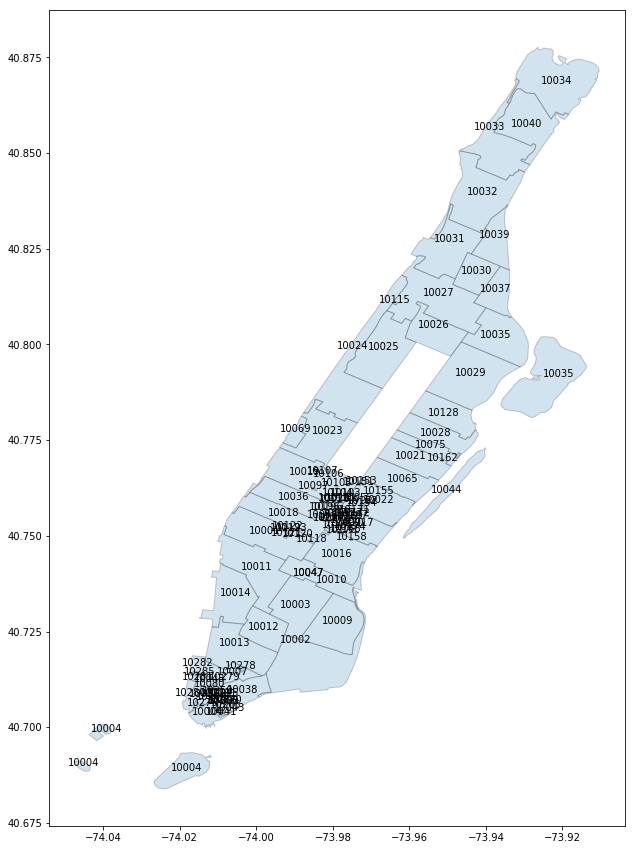

In [16]:
zipsMan.plot(figsize=(15, 15), edgecolor='black', alpha=0.2)
for idx, row in zipsMan.iterrows():
    plt.annotate(s=row['ZIPCODE'], xy=row['coords'], color='Black', horizontalalignment='center', size=10)


In [17]:
zipsMan10075 = zipsMan[(zipsMan.ZIPCODE == 10017)]
zipsMan10040 = zipsMan[(zipsMan.ZIPCODE == 10040)]

/anaconda2/lib/python2.7/site-packages/geopandas/plotting.py:393: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)
/anaconda2/lib/python2.7/site-packages/geopandas/plotting.py:393: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)


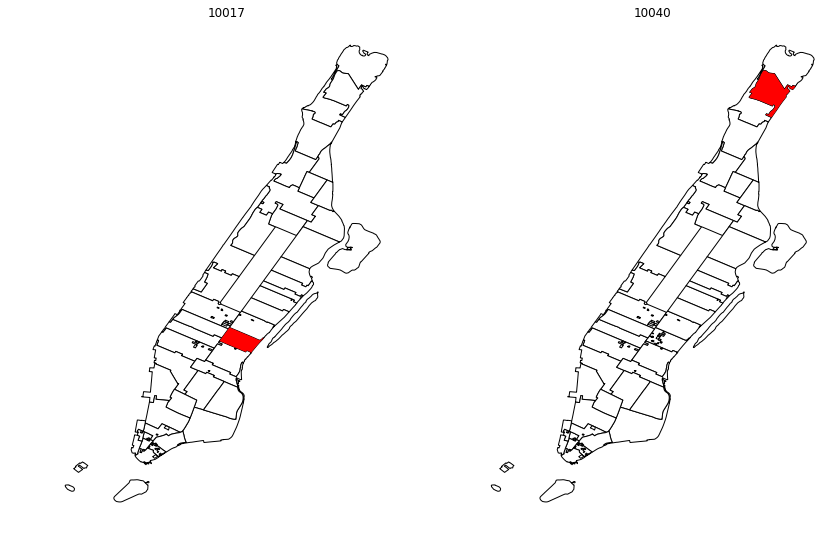

In [15]:
fig = plt.figure(figsize=(14,14))

ax = fig.add_subplot(121)
ax = zipsMan.plot(column='PUTime', figsize=(10,10), color='white', edgecolor='black', k=10, legend=True, ax=ax)
zipsMan10075.plot(color='red', ax=ax)
plt.title('10017')
ax.set_axis_off()

ax1 = fig.add_subplot(122)
ax1 = zipsMan.plot(column='PUTime', figsize=(10,10), color='white', edgecolor='black', k=10, legend=True, ax=ax1)
zipsMan10040.plot(color='red', ax=ax1)
plt.title('10040')
ax1.set_axis_off()